<a href="https://colab.research.google.com/github/DrFabach/sciDoCours/blob/master/TD_ml_avec_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> Premières classifications </H1>

Le but de ce notebook est de faire ses premiers pas en classification supervisée, i.e. lorsque les données d'apprentissage disposent de classes labelisées. Pour cela nous utiliserons un jeu de données très connu dans la communauté : IRIS.

Dans un premier temps, nous présentons une première classification pour apprendre à utiliser un classifieur et à prédire une valeur. Les jeux de données d'apprentissage et de de test sont présentés par la suite. Nous présentons ensuite différentes mesures pour évaluer un modèle.   
Etant donné qu'il n'est pas possible d'avoir un classifieur universel (NO FREE LUNCH THEOREM), nous verrons comment utiliser différents classifieurs et comment rechercher les meilleurs paramètres d'un classifieur. Enfin nous verrons comment sauvegarder et ré-utiliser un modèle appris.


## Installation





Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.
 

In [1]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...


#!pip install MyNLPUtilities

# ne pas oublier de relancer le kernel du notebook

In [2]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns


# librairies scikit learn
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets



##Le jeu de données IRIS


IRIS est un jeu de données multivariées qui a été présenté la première fois par R. Fisher en 1936 (R. Fisher, "The use of multiple measurements in taxonomic problems", Annals Eugen. 7 (1936) 179-188). Introduit tout d'abord comme exemple d'application de l'analyse discriminante linéaire, il a été très largement utilisé par la communauté de l'apprentissage automatique.   

Le jeu de données est constitué de 3 classes correspondant à des espèces différentes d'Iris : 'Iris Setosa', 'Iris Virginica' et 'Iris Versicolor' et possède 4 caractéristiques correspondant à : la longueur et largeur des sépales et des pétales en centimètres. 

<IMG SRC="http://www.lirmm.fr/~poncelet/EGC2021/Iris.png" align="center" >  
    
tiré de : https://www.datacamp.com/community/tutorials/machine-learning-in-r  
    
    
Tout au long de ce notebook, nous illustrerons les principales notions à l'aide de ce jeu de données. 


In [4]:
import pandas as pd
import numpy as np

# Le jeu de données est disponible sur le site de l'UCI
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# chargement du jeu de données à partir de l'URL
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

# creation d'un dataframe pour récupérer les données
df_iris = pd.read_csv(url, names=names)

# affichage des 5 premières lignes du jeu de données
display(df_iris.head())

# affichage du nombre de classes et de val
print ("Nombre d'occurrences par classe : \n",df_iris['Species'].value_counts())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Nombre d'occurrences par classe : 
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


## Toute première classification

La classification supervisée considère les données sous la forme ($X$,$Y$) où $X$ correspond aux variables prédictives et $Y$ est le résultat d'une observation, i.e. la variable à prédire. 
En se basant sur un jeu d'apprentissage, un algorithme de classification supervisée cherche une fonction mathématique $F$ qui permet de transformer (au mieux) $X$ vers $Y$, i.e. $F(X) \approx Y$.  

Convention : les variables prédictives sont celles associées aux objets, généralement stockées sous la forme d'une matrice aussi, par convention, elles sont souvent notées en majuscule (notation d'une matrice). Les variables à prédire sont généralement stockées dans un vecteur et sont souvent notées avec une lettre majuscule (notation d'un vecteur).  

Autrement il est tout à fait possible d'utiliser des noms de variables significatives comme data, target.

In [5]:
# Conversion du dataframe
array = df_iris.values #necessité de convertir le dataframe en numpy

# Récupération des différentes colonnes
#X matrice représentant les variables prédictives 
X = array[:,0:4] 
#y vecteur : représentant la variable à prédire
y = array[:,4]


Pour apprendre un modèle la première chose à faire est de lui créer un estimateur. Scikit-learn, permet de faire le faire en appelant la méthode *fit(X, y)*.  

Pour une première illustration, nous utilisons un classifieur naïve Bayes (https://scikit-learn.org/stable/modules/naive_bayes.html).

In [6]:
import sklearn
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

# création de l'estimateur 
clf.fit(X, y) 

GaussianNB()

Il est possible d'obtenir les hyperparamètres d'un classifieur à l'aide de *get_params*.

In [7]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Pour prédire la classe d'une valeur, il suffit d'appliquer la méthode *predict* sur des variables prédictives. Par exemple, nous savons que les valeurs du 5ième IRIS sont 5.0,	3.6,	1.4,	0.2 et qu'il appartient à la classe Iris-setosa.

In [8]:
#Prediction du résultat

result = clf.predict([[ 5.0,  3.6,  1.4,  0.2]])
print ('La prédiction du modèle pour [ 5.0,  3.6,  1.4,  0.2] est', 
       result)

La prédiction du modèle pour [ 5.0,  3.6,  1.4,  0.2] est ['Iris-setosa']


Et si nous appliquions notre modèle sur ..... nos données d'apprentissage. Bien sûr cela n'a aucune sens ! l'objectif ici est de voir un peu comment notre modèle se comporte.

In [9]:
result = clf.predict(X)
print (result)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'

Une première évaluation de la qualité de la prédiction peut se faire avec le calcul de l'*accuracy* (pourcentage de prédictions correctes). 

In [10]:
from sklearn.metrics import accuracy_score

print ('accuracy: ',accuracy_score(result, y))

accuracy:  0.96


Comme nous pouvons le constater, même sur le jeu d'apprentissage il y a des erreurs dans le modèle appris.
Pour connaître les objets mal classés :

In [11]:
y = np.asarray(y)
misclassified = np.where(y != clf.predict(X))

print('Les objets mal classés sont :')

i=0
for i in misclassified:
    print('\n',df_iris.iloc[i,:]['Species'])


print ("ils sont classés respectivement en :")
for i in misclassified: 
    print ('\n', i,'classé en ',clf.predict(X)[i],'\n')
    print ('\n')

Les objets mal classés sont :

 52     Iris-versicolor
70     Iris-versicolor
77     Iris-versicolor
106     Iris-virginica
119     Iris-virginica
133     Iris-virginica
Name: Species, dtype: object
ils sont classés respectivement en :

 [ 52  70  77 106 119 133] classé en  ['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor'] 





## Jeu d'apprentissage et de test 

En classification, il est indispensable de créer un jeu d'apprentissage sur lequel un modèle est appris et un jeu de test pour évaluer le modèle.
La fonction *train_test_split* permet de décomposer le jeu de données en 2 groupes : les données pour l'apprentissage et les données pour les tests.

Le paramètre *train_size* indique la taille du jeu d'apprentissage qui sera utilisé.  
le paramètre *random_state* spécifie un entier germe du nombre aléatoire pour le tirage. S'il n'est pas spécifié sickit learn utilise un générateur de nombre aléatoire à partir de np.random.   




Dans notre exemple nous prenons 30% du jeu de données comme jeu de test.




In [12]:
from sklearn.model_selection import train_test_split 

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


L'apprentissage du modèle se fait comme précédemment

In [13]:
clf = GaussianNB()
clf.fit(X_train, y_train)


GaussianNB()

De même pour la prédiction

In [14]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print('\n accuracy : %0.3f'%(accuracy_score(y_pred, y_test)),'\n')



 accuracy : 0.943 



Le problème essentiel de cette approche est que le modèle est appris sur un seul jeu de données et qu'en fonction de la sélection les résultats peuvent être très différents.
La bonne solution consiste à utiliser la **cross validation**.
Dans notre cas, nous allons utiliser une 10-fold cross validation pour évaluer la qualité. 
Le jeu de données sera découpé en 10 parties, entrainé sur 9, testé sur 1 et cela sera répété pour toutes les combinaisons du découpage. 

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [16]:
clf = GaussianNB()

scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, scoring=scoring)

print('Les différentes accuracy pour les 10 évaluations sont : \n',
      score,'\n')
print ('Accuracy moyenne : %0.3f'%(score.mean()), 
       ' standard deviation %0.3f'%(score.std()))


Les différentes accuracy pour les 10 évaluations sont : 
 [0.8        0.86666667 1.         1.         0.93333333 1.
 1.         1.         0.93333333 1.        ] 

Accuracy moyenne : 0.953  standard deviation 0.067


L'écart type est très important car il montre les grandes variations qui peuvent exister par rapport aux jeux de données.

## Plus loin sur l'évaluation d'un modèle 

L'accuracy (nombre d'objets correctement classés) est la métrique la plus simple pour comprendre le 
résultat de la classification mais ne tient pas du tout compte de la distribution des données et ne permet pas d'indiquer les erreurs. Par exemple avec des classes très déséquilibrées (1 vs 99), nous pouvons avoir un modèle avec une accuracy de 99%.  

Par la suite, par simplification, nous reprenons une classification réalisée sans cross validation mais le principe est évidemment le même avec cross validation. Nous introduisons la matrice de correlation et les différentes mesures : precision, rappel et F1-score.

In [17]:

array = df_iris.values
X = array[:,0:4] 
y = array[:,4]

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('\n accuracy : %0.3f'%(accuracy_score(y_pred, y_test)),'\n')


 accuracy : 0.943 



La matrice de confusion permet de connaître les objets bien ou mal classés. Il suffit d'utiliser la fonction *confusion_matrix*. Nous visualisons également cette matrice.


 matrice de confusion 
 [[34  0  0]
 [ 0 33  5]
 [ 0  1 32]]


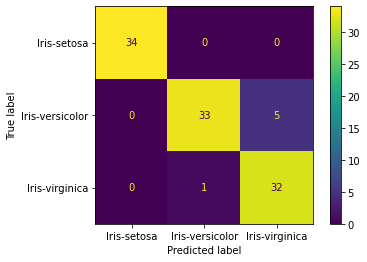

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

conf = confusion_matrix(y_test, y_pred)
print ('\n matrice de confusion \n',conf)
disp = ConfusionMatrixDisplay(conf, display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
disp.plot()

Il est possible d'obtenir plus d'information : *precision*, *recall* et  *f1-measure* à l'aide de *classification_report*.

In [23]:
from sklearn.metrics import classification_report
conf = confusion_matrix(y_test, y_pred)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, y_pred))


 matrice de confusion 
 [[34  0  0]
 [ 0 33  5]
 [ 0  1 32]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       0.97      0.87      0.92        38
 Iris-virginica       0.86      0.97      0.91        33

       accuracy                           0.94       105
      macro avg       0.95      0.95      0.94       105
   weighted avg       0.95      0.94      0.94       105



Par la suite, pour afficher les résultats de classification : rapport de classification et matrice de confusion, nous utilisons la fonction suivante : 


Accuracy : 0.943
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa    1.00000   1.00000   1.00000        34
Iris-versicolor    0.97059   0.86842   0.91667        38
 Iris-virginica    0.86486   0.96970   0.91429        33

       accuracy                        0.94286       105
      macro avg    0.94515   0.94604   0.94365       105
   weighted avg    0.94688   0.94286   0.94290       105



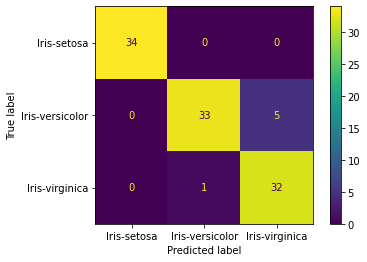

In [24]:
# fonction qui affiche le classification report et la matrice de confusion
def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)

  disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=classes)
  disp.plot()

MyshowAllScores(y_test,y_pred)

**Rappel** :  
Considérons une matrice de confusion dans un cas binaire. Par exemple présence de SPAM ou non dans des mails.   

  $$  \begin{array}{|c|c|c|}
  \hline
  N= & {\bf PREDIT} & {\bf PREDIT}  \\
  115& {\bf NON} & {\bf OUI} \\
  \hline
  {\bf REEL} & 60 & 10 \\
  {\bf NON} & & \\
  \hline
 {\bf REEL} & 5 & 40 \\
  {\bf OUI} & & \\
  \hline
\end{array}$$

La matrice nous permet de voir qu'il y a deux classes prédites (OUI ou NON). Le classifieur fait un total de 115 prédictions. Sur ces 115 cas, le classifieur a prédit  OUI 50 fois et NON 65 fois. En fait 45 documents sont des SPAMS et 70 ne le sont pas. 


**TP** (True positive) : il s'agit des objets qui étaient prédits OUI (il s'agit de SPAM) et qui sont effectivement des SPAM.  
**TN** (True negative) : il s'agit des objets qui étaient prédits NON (il ne s'agit pas de SPAM) et qui effectivement ne sont pas des SPAM.  
**FP** (False positive) : il s'agit des objets qui étaient prédits comme SPAM mais qui en fait n'étaient pas des SPAM.  
**FN** (False negative) : il s'agit des objets qui étaient prédits comme non SPAM qui en fait s'avèrent être des SPAM.  
Dans la matrice ci-dessous ces éléments sont reportés :  

$$  \begin{array}{|c|c|c|c|}
  \hline
  N= & {\bf PREDIT} & {\bf PREDIT} & \\
  115& {\bf NON} & {\bf OUI} & \\
  \hline
  {\bf REEL} & TN=60 & FP=10 & 70\\
  {\bf NON} & & \\
  \hline
 {\bf REEL} & FN=5 & TP=40 & 45\\
  {\bf OUI} & & \\
  \hline
  & 65 & 50 &\\
  \hline
\end{array}$$

L'**accuracy**  correspond au pourcentage de prédiction correcte. Elle est définie par 
$$\frac{TP+TN}{TN+FP+FN+TP}=\frac{40+60}{60+10+5+40}=0.86.$$  
Le **recall** (ou sensitivity ou True Positive Rate ou rappel) correspond au nombre d' objets pertinents retrouvés par rapport aux nombres d'objets pertinents du jeu de données. Dans notre cas, pour tous les OUI présents combien de fois le OUI a t'il été prédit ?

$$recall=\frac{Nombre\ de\ SPAM\ correctement\ reconnus}{Nombre\ total\ de\ SPAM\ dans\ le\ jeu\ de\ données} = \frac{TP}{FN+TP}=\frac{40}{40+5}=0.88.$$  
La **precision** correspond à la proportion d'objets pertinents parmi les objets sélectionné. Tous les objets retournés non pertinents constituent du bruit. 
$$precision=\frac{Nombre\ de\ SPAM\ correctement\ reconnus}{Nombre\ de\ fois\ où\ un\ objet\ a\ été\ prédit\ SPAM} = \frac{TP}{TP+FP}=\frac{40}{40+10}=0.8.$$  

Le **f1-score** (ou f-measure) est la moyenne harmonique du rappel et de la précision.
$$f1-score=2\times\frac{precision \times recall}{precision + recall}=2\times\frac{0.8 \times 0.88}{0.8+0.88}.$$  

Dans le cas d'une classification multiclasse, à partir de la matrice de confusion, la precision est calculée, pour une colonne $i$, par :  
$$precision_i = \frac{M_{ii}}{\sum_j M_{ji}}$$
et le recall par : 
$$ recall_i = \frac{M_{ii}}{\sum_j M_{ij}}$$  

Pour la matrice de confusion suivante : 
\begin{array}{cccc}
Iris-setosa &34 & 0 & 0\\
Iris-versicolor & 0 &33 & 5\\
Iris-virginica & 0 & 1 &32\\
\end{array}

classification_report retourne le résultat suivant :  

 \begin{array}{ccccc}
           &   precision  &  recall & f1-score &  support\\
\\
    Iris-setosa    &   1.00  &    1.00  &    1.00   &     34\\
Iris-versicolor   &    0.97 &     0.87  &    0.92  &      38\\
 Iris-virginica   &    0.86  &    0.97  &    0.91  &      33\\
\\
    avg / total    &   0.95  &    0.94  &    0.94   &    105\\
\end{array}    

La precision d'Iris-versicolor est obtenue par : 
$$precision_i = \frac{M_{ii}}{\sum_j M_{ji}}=\frac{33}{33+1}=0.97.$$
Le rappel d'Iris-versicolor est obtenue par : 
$$ recall_i = \frac{M_{ii}}{\sum_j M_{ij}}=\frac{33}{33+5}=0.87.$$
La precision d'Iris-virginica est obtenue par : 
$$precision_i = \frac{M_{ii}}{\sum_j M_{ji}}=\frac{32}{32+5}=0.86.$$
Le rappel d'Iris-versicolor est obtenue par : 
$$ recall_i = \frac{M_{ii}}{\sum_j M_{ij}}=\frac{32}{32+1}=0.96.$$

Les métriques peuvent être appelées indépendamment :

In [25]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1.         0.97058824 0.86486486]
recall: [1.         0.86842105 0.96969697]
fscore: [1.         0.91666667 0.91428571]
support: [34 38 33]


**Remarque :** il existe, bien entendu, d'autres mesures pour évaluer un classifieur. Par exemple, la sensiblité, la spécificité, l’air sous la courbe roc (AUC), l’indice de Gini, etc. 

## Utiliser plusieurs classifiers

Comme l'indique le NO FREE LUNCH THEOREM il n'existe pas un classifieur universel et en fonction des données il est souvent nécessaire d'en évaluer plusieurs pour retenir le plus efficace. Le principe est similaire au précédent, il suffit de les mettre dans une structure et de boucler dessus.  

Dans cette section, nous transformons très légérement nos données. Si nous regardons les différentes valeurs associées aux caractéristiques nous voyons que celles-ci sont assez grandes (e.g. 5.9 cm). Cela peut fortement impacter les différents classifiers (e.g. SVM), aussi nous allons normaliser les données de manière à ce qu'elles soient dans un intervalle de valeur. Pour cela, nous utilisons *StandardScaler* qui va transformer les données telles que la distribution aura une valeur moyenne de 0 et un écart type de 1.  

Comme vous pouvez le constater dans la cellule suivante, le principe pour cette transformation est assez similaire à ce que nous avons vu précédemment : application d'un estimateur (ici le changement de distribution) et transformation des données. 

In [26]:

from sklearn.preprocessing import StandardScaler



# Certains algorithmes, notamment SVM qui résout simplement un problème d'optimisation quadratique ou bien LR, 
# sont très sensibles et ne peuvent pas converger si les valeurs ne sont pas normalisées.
# Normalisation en utilisant StandardScaler qui transforme les caractéristiques (xi) 
# en valeurs entre [-1 .. 1]. 
# Cette plage de valeurs peut être changée via les parametres feature_range=(min, max). 

# creation d'un objet de la classe StandardScaler
standardscaler = StandardScaler()

# application du changement de distribution aux variables descriptives

X_standardscale = standardscaler.fit_transform(X)


X=X_standardscale

validation_size=0.3 

testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=validation_size, random_state=seed,test_size=testsize)


Dans la suite de la section, nous utilisons différents types de classifier :  'LogisticRegression', 'DecisionTree','KNeighbors', 'GaussianNB' et 'SVM'.   
Les paramètres utilisés pour chacune des approches sont ceux par défaut. 
Pour chaque approche nous faisons une cross validation de 10.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

Une fois les modèles définis, il suffit de boucler en faisant une cross validation

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    #pour avoir les paramètres utilisés dans le modèle enlever commentaire ligne suivante
    #print (model.get_params())
    print ("Time pour",name," %0.5f"%(time.time() - start_time),'s')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %0.3f (%0.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)       

Time pour LR  0.11458 s
LR: 0.953 (0.052)
Time pour KNN  0.03185 s
KNN: 0.953 (0.043)
Time pour CART  0.01621 s
CART: 0.940 (0.063)
Time pour NB  0.01765 s
NB: 0.953 (0.067)
Time pour SVM  0.03114 s
SVM: 0.960 (0.044)


[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

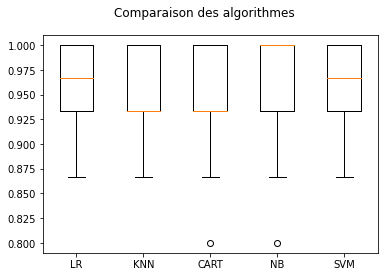

In [30]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

 Par la suite, nous utilisons SVM comme modèle de prédiction.

Accuracy : 0.952
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa    1.00000   1.00000   1.00000        34
Iris-versicolor    0.97143   0.89474   0.93151        38
 Iris-virginica    0.88889   0.96970   0.92754        33

       accuracy                        0.95238       105
      macro avg    0.95344   0.95481   0.95301       105
   weighted avg    0.95474   0.95238   0.95244       105



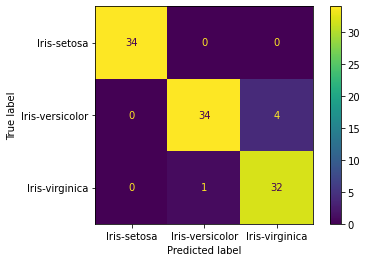

In [31]:

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
MyshowAllScores(y_test,y_pred)


## Les hyperparamètres


Dans l'approche précédente nous avons pris les valeurs par défaut pour les différents classifieurs. Cependant en fonction des paramètres du classifieur les résultats peuvent être complétement différents (choix du noyeau SVM, nombre de K dans KNeighbors, etc. ). Scikit learn permet de pouvoir faire une recherche exhaustive (grid search) pour trouver les paramètres les plus pertinents pour un classifieur.

In [32]:

array = df_iris.values
X = array[:,0:4] 
y = array[:,4]

standardscaler = StandardScaler()
X_standardscale = standardscaler.fit_transform(X)
X=X_standardscale

validation_size=0.3 

testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=validation_size, 
                                                    random_state=seed,
                                                    test_size=testsize)



Considérons un arbre de décision. Les principaux paramètres sont le critère pour découper (gini ou entropy), la profondeur maximale de l'arbre, et le nombre d'échantillons par feuille. Il faut, dans un premier temps, initialiser les variables à tester dans un dictionnaire.  
Le test de toutes les valeurs se fait à l'aide de la fonction *GridSearchCV*.
Ele prend comme paramètre le classifieur, le dictionnaire des paramètres, le type de scoring, le nombre de crossvalidation.  

Quelques paramètres souvent utilisés :  
-  *n_jobs* : (par défaut 1) nombre de coeurs à utiliser pour effectuer les calculs, dépend du cpu. Si la machine possède plusieurs coeurs, il est possible d'indiquer de tous les utiliser en mettant *n_jobs=-1*  
-  *verbose* : affichage du déroulement des calculs, 0 = silent.
- *random_state* : si le classifieur utilisé utilise de l'aléatoire, random_state permet de fixer le générateur pour reproduire les résultats.   


Un grid search est long à obtenir dans la mesure où il faut essayer l'ensemble des cas. La possibilité de répartir sur plusieurs processeur permet de faire gagner beaucoup de temps. 

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_param = {  
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
}


gd_sr = GridSearchCV(DecisionTreeClassifier(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                  
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy')

Pour connaître les meilleures conditions : 

In [40]:
print ('meilleur score %0.3f'%(gd_sr.best_score_),'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

meilleur score 0.956 

meilleurs paramètres {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1} 

meilleur estimateur DecisionTreeClassifier(max_depth=2) 



Avec KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
grid_param = {  
    'n_neighbors': list(range(1,15)),
    'metric': ['minkowski','euclidean','manhattan']
}
                        
gd_sr = GridSearchCV(estimator=KNeighborsClassifier(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score %0.3f'%(gd_sr.best_score_),'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')


meilleur score 1.000 

meilleurs paramètres {'metric': 'manhattan', 'n_neighbors': 9} 

meilleur estimateur KNeighborsClassifier(metric='manhattan', n_neighbors=9) 



Avec SVM 

In [43]:
from sklearn.svm import SVC
grid_param = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}

gd_sr = GridSearchCV(estimator=SVC(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score %0.3f'%(gd_sr.best_score_),'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')


meilleur score 1.000 

meilleurs paramètres {'C': 1, 'gamma': 0.001, 'kernel': 'linear'} 

meilleur estimateur SVC(C=1, gamma=0.001, kernel='linear') 



Pour voir l'ensemble des évaluations effectuées par GridSearchCV : 

In [44]:

# convertion en DataFrame
results = pd.DataFrame(gd_sr.cv_results_) 
# Affichage des 5 premières lignes
display(results.head())


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002067,0.001190,0.000876,0.000249,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.333333,0.777778,...,0.511111,0.217732,26,0.388889,0.722222,0.722222,0.388889,0.388889,0.522222,0.163299
1,0.001075,0.000440,0.000655,0.000272,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.333333,0.777778,...,0.511111,0.217732,26,0.388889,0.722222,0.722222,0.388889,0.388889,0.522222,0.163299
2,0.001147,0.000438,0.000689,0.000252,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.333333,0.777778,...,0.511111,0.217732,26,0.388889,0.722222,0.722222,0.388889,0.388889,0.522222,0.163299
3,0.001694,0.000671,0.001081,0.000381,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.333333,0.777778,...,0.511111,0.217732,26,0.388889,0.722222,0.722222,0.388889,0.388889,0.522222,0.163299
4,0.001168,0.000505,0.000622,0.000327,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.333333,0.777778,...,0.511111,0.217732,26,0.388889,0.722222,0.722222,0.388889,0.388889,0.522222,0.163299


L'avantage de GridSearchCV est qu'il va parcourir toutes les conditions et retourner celles qui sont les meilleures pour la ou les mesures de scoring recherchée (dans notre cas nous avons privilégié l'accuracy).
Cela est très pratique mais est malheureusement impossible dans certains cas car beaucoup trop long à mettre en place.
Une solution possible est d'utiliser *RandomizedSearchCV* qui parcourt de manière aléatoire l'espace de recherche. 
Il suffit dans ce cas de spécifier des tirages aléatoires pour les valeurs possibles des paramètres et de préciser le nombre d'itérations voulues.
Le second usage de *RandomizedSearchCV* est, lorsque l'on n'a pas une très bonne idée de ce que cela peut donner ou des paramètres à utiliser de faire appel à lui pour avoir des valeurs qui peuvent être significatives et de faire suivre à partir de ces valeurs une recherche via *GridSearchCV*.




In [45]:
randint(1, 20)

In [47]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rand_param = {  
    'max_depth': randint(1, 20),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 20)
}


rand_sr = RandomizedSearchCV(estimator=DecisionTreeClassifier(), 
                             param_distributions = rand_param, 
                             random_state=1, 
                             n_iter=20, 
                             cv=3, 
                             n_jobs=-1,
                             scoring='accuracy',
                     
                             return_train_score=True)

rand_sr.fit(X_train, y_train)  


print ('meilleur score %0.3f'%(rand_sr.best_score_),'\n')
print ('meilleurs paramètres', rand_sr.best_params_,'\n')
print ('meilleur estimateur',rand_sr.best_estimator_,'\n')

# convertion en DataFrame
results = pd.DataFrame(rand_sr.cv_results_) 
# Affichage des 5 premières lignes
display(results.head())



meilleur score 0.956 

meilleurs paramètres {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1} 

meilleur estimateur DecisionTreeClassifier(criterion='entropy', max_depth=16) 



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001318,0.000622,0.000394,0.000058,entropy,12,13,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.733333,0.733333,0.733333,0.733333,0.000000,9,0.733333,0.733333,0.733333,0.733333,0.0
1,0.000609,0.000162,0.000306,0.000049,gini,10,12,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.666667,0.666667,0.733333,0.688889,0.031427,14,0.733333,0.733333,0.733333,0.733333,0.0
2,0.002558,0.002678,0.000393,0.000107,entropy,16,1,"{'criterion': 'entropy', 'max_depth': 16, 'min...",0.933333,0.933333,1.000000,0.955556,0.031427,1,1.000000,1.000000,1.000000,1.000000,0.0
3,0.005961,0.007723,0.000333,0.000039,gini,2,13,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.733333,0.733333,0.733333,0.733333,0.000000,9,0.733333,0.733333,0.733333,0.733333,0.0
4,0.001139,0.000974,0.000278,0.000022,entropy,14,7,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.933333,0.933333,1.000000,0.955556,0.031427,1,1.000000,1.000000,1.000000,1.000000,0.0


## GridsearchCV et plusieurs classifieurs

Il est tout à fait possible d'utiliser GridsearchCV
 avec plusieurs classifieurs. Il suffit pour cela d'initaliser les classifieurs dans un dictionnaire et faire de même pour les paramètres.

In [48]:


classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC()
}

params = {'KNeighborsClassifier' : [{'n_neighbors': list(range(1,15))},
    {'metric': ['minkowski','euclidean','manhattan']}],
           'DecisionTreeClassifier': [{'max_depth': [1,2,3,4,5,6,7,8,9,10]},
    {'criterion': ['gini', 'entropy']},
    {'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}],
       'SVC':[{'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}]  }



In [49]:
class Result_Parameters:
     def __init__(self,name, score, parameters):
         self.name = name
         self.score = score
         self.parameters = parameters
     def __repr__(self):
         return repr((self.name, self.score, self.parameters))

       
results = []
for key,value in classifiers.items():
    gd_sr = GridSearchCV(estimator=value,  
                     param_grid=params[key],
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1)
    gd_sr.fit(X_train, y_train)  
    result=Result_Parameters(key,gd_sr.best_score_,gd_sr.best_estimator_)
    results.append(result)   
    
    
    
results=sorted(results, key=lambda result: result.score, reverse=True) 

print ('Le meilleur resultat : \n')
print ('Classifier : ',results[0].name, 
       ' score %0.3f' %results[0].score, 
       ' avec ',results[0].parameters,'\n')

print ('Tous les résultats : \n')
for result in results:
    print ('Classifier : ',result.name, 
           ' score %0.3f' %result.score, 
           ' avec ',result.parameters,'\n')
    


Le meilleur resultat : 

Classifier :  SVC  score 1.000  avec  SVC(C=1, gamma=0.001, kernel='linear') 

Tous les résultats : 

Classifier :  SVC  score 1.000  avec  SVC(C=1, gamma=0.001, kernel='linear') 

Classifier :  KNeighborsClassifier  score 0.978  avec  KNeighborsClassifier(n_neighbors=6) 

Classifier :  DecisionTreeClassifier  score 0.956  avec  DecisionTreeClassifier(max_depth=2) 



## Les pipelines 

Il peut arriver que différentes combinaisons de pré-traitements puissent être utilisées. Par exemple il est possible d'utiliser du changement d'échelle, du PCA (projection sur un nombre différent de dimensions), de faire du remplacement de valeurs manquantes ...  

L'objectif du pipeline est de pouvoir regrouper l'ensemble de ces prétraitements et de pouvoir les faire suivre par le classifier.
Le principe consiste à d'abord mettre la chaîne de pré-traitement, d'ensuite mettre le classifier et d'utiliser directement le pipeline.

**Attention :** les pipelines sont très importants lorsque l'on sauvegarde un modèle. En effet comme ils prennent en compte les pré-traitements tout est sauvegardé. Cela veut dire que dans le cas de nouvelles données à évaluer avec un modèle lors de la prédiction les données seront automatiquement transformées. (Voir partie utiliser de nouvelles données plus bas).

L'exemple suivant illustre un pipeline où un standard scaling est réalisé puis un PCA et enfin un DecisionTree est appliqué.

Création du pipeline 

Accuracy : 0.914
Classification Report
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000        34
         1.0    0.91429   0.84211   0.87671        38
         2.0    0.83333   0.90909   0.86957        33

    accuracy                        0.91429       105
   macro avg    0.91587   0.91707   0.91543       105
weighted avg    0.91660   0.91429   0.91439       105



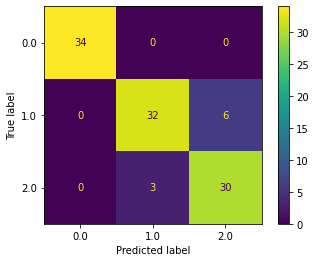

In [50]:

from sklearn.preprocessing import LabelEncoder


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 'Species']
df_iris = pd.read_csv(url, names=names)

#transformation de Species via LabelEncoder
class_label_encoder = LabelEncoder()
df_iris['Species']=class_label_encoder.fit_transform(df_iris['Species'].values)


array = df_iris.values
X = array[:,0:4] 
y = array[:,4]


print ('Création du pipeline \n')
pipeline = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', DecisionTreeClassifier(random_state=42))])

validation_size=0.3 

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
MyshowAllScores(y_test,y_pred)



Il est possible d'utiliser GridSearchCV pour chercher les meilleures valeurs dans un pré-traitement.

In [52]:
from sklearn.model_selection import GridSearchCV
print ('Création du pipeline \n')
pipeline = Pipeline([('pca', PCA()),
                    ('clf', DecisionTreeClassifier(random_state=42))])

grid_param = {
    'pca__n_components': [2,3]
}


gd_sr = GridSearchCV(pipeline,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score %0.3f'%(gd_sr.best_score_),'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

Création du pipeline 

meilleur score 0.956 

meilleurs paramètres {'pca__n_components': 2} 

meilleur estimateur Pipeline(steps=[('pca', PCA(n_components=2)),
                ('clf', DecisionTreeClassifier(random_state=42))]) 



Ou bien de faire les deux en même temps. 

In [54]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 'Species']
df_iris = pd.read_csv(url, names=names)

#transformation de Species en float pour StantardScaler
class_label_encoder = LabelEncoder()
df_iris['Species']=class_label_encoder.fit_transform(df_iris['Species'].values)


array = df_iris.values
X = array[:,0:4] 
y = array[:,4]

pipeline = Pipeline([('pca', PCA()),
                    ('clf', DecisionTreeClassifier())])



grid_param = [{'pca__n_components': [2,3]},
                {'clf': [DecisionTreeClassifier()],
                 'clf__max_depth': [1,2,3,4,5,6,7,8,9,10],
                 'clf__criterion': ['gini', 'entropy'],
                 'clf__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
                }]



gd_sr = GridSearchCV(estimator=pipeline,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  
print ('meilleur score %0.3f'%(gd_sr.best_score_),'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

meilleur score 0.978 

meilleurs paramètres {'pca__n_components': 2} 

meilleur estimateur Pipeline(steps=[('pca', PCA(n_components=2)),
                ('clf', DecisionTreeClassifier())]) 



## Une petite mise en  pratique



Jusqu'à présent vous n'avez que vu (ou revu) les principes généraux de la classification. Avant de s'attaquer aux données textuelles, voici un petit exercice pour mettre en oeuvre les concepts introduits dans ce notebook. Les IRIS est connu, très connu ... alors changeons de domaine pour ... les pingouins


    
De nombreux jeux de données ont été proposés en alternative à Iris qui est très (trop ?) utilisé. Le jeu de données que nous allons utiliser possède des caractéristiques assez similaires à IRIS mais concerne les espèces de pingouins. Il est disponible ici : https://allisonhorst.github.io/palmerpenguins/  
    
<IMG SRC="http://www.lirmm.fr/~poncelet/EGC2021/pinguins.png" align="center" >  
    
Il contient à l'origine 17 caractéristiques différentes ('studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage','Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments') et concerne 3 espèces de pingouins différentes ('Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)'). L'un des objectifs est à partir des différentes caractéristiques de prédire l'espèce de pingouins.   
Le jeu de données d'origine contient de nombreuses valeurs manquantes, des données à la fois catégorielles, numériques, etc. Aussi nous en proposons une version nettoyée que vous pouvez récupérer : 

In [55]:
!wget https://www.lirmm.fr/~poncelet/EGC2021/penguins.csv

--2023-02-01 08:19:33--  https://www.lirmm.fr/~poncelet/EGC2021/penguins.csv
Resolving www.lirmm.fr (www.lirmm.fr)... 193.49.104.251
Connecting to www.lirmm.fr (www.lirmm.fr)|193.49.104.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27042 (26K) [text/csv]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]  26.41K  --.-KB/s    in 0.09s   

2023-02-01 08:19:34 (288 KB/s) - ‘penguins.csv’ saved [27042/27042]



<font color=red>Exercice :</font> la cellule suivante permet de charger le dossier et d'avoir quelques informations sur les données manipulées. En outre, il propose d'appliquer un standardScaler sur les données prédictives. L'objectif à présent est de proposer un classifier qui soit capable de prédire le mieux possible l'espèce de pingouin.  

**Indication :** SVM se comporte bien sur ce jeu de données.

In [56]:
# lecture du fichier
df_penguins=pd.read_csv("penguins.csv", encoding='utf8')

# les premières lignes
print (df_penguins.head())

# les différentes colonnes
print (df_penguins.columns)

# le nombre d'enregistrements
print (df_penguins.shape)

# la répartition du nombre de pingouins
print ("répartition des espèces de pingouins :\n",df_penguins['Species'].value_counts())

# selection des variables prédictives et à prédire
array = df_penguins.values
X = array[:,0:6] 
y = array[:,6]

# attention étant donné la différence entre les valeurs il est nécessaire de normaliser
standardscaler = StandardScaler()
X_standardscale = standardscaler.fit_transform(X)
X=X_standardscale

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.5               17.4                186.0         3800.0   
1                40.3               18.0                195.0         3250.0   
2                36.7               19.3                193.0         3450.0   
3                39.3               20.6                190.0         3650.0   
4                38.9               17.8                181.0         3625.0   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)                              Species  
0            8.94956          -24.69454  Adelie Penguin (Pygoscelis adeliae)  
1            8.36821          -25.33302  Adelie Penguin (Pygoscelis adeliae)  
2            8.76651          -25.32426  Adelie Penguin (Pygoscelis adeliae)  
3            8.66496          -25.29805  Adelie Penguin (Pygoscelis adeliae)  
4            9.18718          -25.21799  Adelie Penguin (Pygoscelis adeliae)  
Index(['Culmen Length (mm)', 'Culmen Depth (m

In [57]:


classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC()
}

params = {'KNeighborsClassifier' : [{'n_neighbors': list(range(1,15))},
    {'metric': ['minkowski','euclidean','manhattan']}],
           'DecisionTreeClassifier': [{'max_depth': [1,2,3,4,5,6,7,8,9,10]},
    {'criterion': ['gini', 'entropy']},
    {'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}],
       'SVC':[{'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}]  }



In [ ]:
class Result_Parameters:
     def __init__(self,name, score, parameters):
         self.name = name
         self.score = score
         self.parameters = parameters
     def __repr__(self):
         return repr((self.name, self.score, self.parameters))

       
results = []
for key,value in classifiers.items():
    gd_sr = GridSearchCV(estimator=value,  
                     param_grid=params[key],
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                     iid=True)
    gd_sr.fit(X, y)  
    result=Result_Parameters(key,gd_sr.best_score_,gd_sr.best_estimator_)
    results.append(result)   
    
    
    results=sorted(results, key=lambda result: result.score, reverse=True) 

print ('Le meilleur resultat : \n')
print ('Classifier : ',results[0].name, 
       ' score %0.3f' %results[0].score, 
       ' avec ',results[0].parameters,'\n')

print ('Tous les résultats : \n')
for result in results:
    print ('Classifier : ',result.name, 
           ' score %0.3f' %result.score, 
           ' avec ',result.parameters,'\n')

    


Le meilleur resultat : 

Classifier :  SVC  score 1.000  avec  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

Tous les résultats : 

Classifier :  SVC  score 1.000  avec  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

Classifier :  KNeighborsClassifier  score 0.997  avec  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform') 

Classifier :  DecisionTreeClassifier  score 0.967  avec  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini'

<font color=blue>Solution :</font> 

In [58]:
# il suffit d'appliquer les approches précédentes. 
# D'abord on peut comparer des algorithmes de classification 
# puis après sélectionner le meilleur et rechercher ses hyperparamètres.


seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    #pour avoir les paramètres utilisés dans le modèle enlever commentaire ligne suivante
    #print (model.get_params())
    print ("Time pour",name," %0.5f"%(time.time() - start_time),'s')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %0.3f (%0.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)       


# SVC a le meilleur score
classifiers = {
    'SVC': SVC()
}

params = {'SVC':[{'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}]  }



       
results = []
for key,value in classifiers.items():
    gd_sr = GridSearchCV(estimator=value,  
                     param_grid=params[key],
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                     iid=True)
    gd_sr.fit(X, y)  
    result=Result_Parameters(key,gd_sr.best_score_,gd_sr.best_estimator_)
    results.append(result)   
    
    
    
results=sorted(results, key=lambda result: result.score, reverse=True) 

print ('Le meilleur resultat :  ')
print ('Classifier : ',results[0].name, 
       ' score %0.2f' %results[0].score, 
       ' avec ',results[0].parameters,' ')

print ('Tous les résultats : ')

NameError: ignored

Maintenant que nous avons vu comment mettre en place un classifier et l'évaluer, nous abordons les données textuelles .... dans le notebook "**2 - Ingénierie des données textuelles**"